使用tanh激活函式來訓練(-1~1)範圍內進行"乘上-1"的神經網路

# Include

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

2022-03-25 20:54:42.248973: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Model

In [3]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='tanh')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[-0.43939078]], dtype=float32), array([0.], dtype=float32)]


2022-03-25 20:54:43.528747: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-25 20:54:43.625171: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-25 20:54:43.625243: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2022-03-25 20:54:43.625260: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2022-03-25 20:54:43.625373: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 455.32.0
2022-03-25 20:54:43.625459: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 455.32.0
2022-03-25 20:54:43.625477: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 455.32.0
2022-03-25 20:54:43.626381: I tensorflow/core/platform/cpu_feature_gua

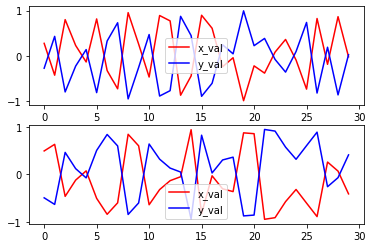

In [4]:
num = 1000
x_train = np.random.rand(num) * 2 - 1
y_train = x_train * -1
x_val = np.random.rand(num) * 2 - 1
y_val = x_val * -1
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [5]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [6]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

2022-03-25 20:54:43.949402: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-25 20:54:43.951257: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10000
16/16 [==============================] - 0s 7ms/step - loss: 0.1042 - val_loss: 0.1034
Epoch 2/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0991 - val_loss: 0.0984
Epoch 3/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0943 - val_loss: 0.0935
Epoch 4/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0896 - val_loss: 0.0890
Epoch 5/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0853 - val_loss: 0.0846
Epoch 6/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0811 - val_loss: 0.0805
Epoch 7/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0772 - val_loss: 0.0765
Epoch 8/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0734 - val_loss: 0.0728
Epoch 9/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0698 - val_loss: 0.0692
Epoch 10/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0664 - val_lo

[array([[-1.2272005]], dtype=float32), array([-0.00292729], dtype=float32)]


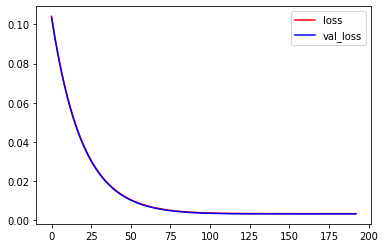

In [7]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

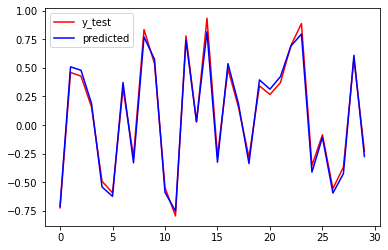

 0.724, -0.712, ads_diff =  0.012
-0.460,  0.509, ads_diff =  0.049
-0.428,  0.479, ads_diff =  0.051
-0.158,  0.188, ads_diff =  0.031
 0.491, -0.541, ads_diff = -0.050
 0.593, -0.623, ads_diff = -0.031
-0.321,  0.373, ads_diff =  0.051
 0.277, -0.330, ads_diff = -0.053
-0.836,  0.771, ads_diff = -0.065
-0.536,  0.575, ads_diff =  0.039
 0.547, -0.588, ads_diff = -0.041
 0.795, -0.752, ads_diff =  0.042
-0.780,  0.742, ads_diff = -0.038
-0.027,  0.030, ads_diff =  0.003
-0.934,  0.816, ads_diff = -0.119
 0.272, -0.325, ads_diff = -0.053
-0.491,  0.537, ads_diff =  0.046
-0.156,  0.186, ads_diff =  0.030
 0.283, -0.336, ads_diff = -0.054
-0.343,  0.395, ads_diff =  0.052
-0.267,  0.314, ads_diff =  0.047
-0.371,  0.424, ads_diff =  0.053
-0.696,  0.692, ads_diff = -0.004
-0.888,  0.796, ads_diff = -0.092
 0.354, -0.412, ads_diff = -0.057
 0.085, -0.107, ads_diff = -0.022
 0.555, -0.594, ads_diff = -0.039
 0.368, -0.425, ads_diff = -0.058
-0.581,  0.610, ads_diff =  0.030
 0.227, -0.275

In [10]:
num = 1000
x_test = np.random.rand(num) * 2 - 1
y_test = x_test * -1
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {predicted[i, 0] + x_test[i]:6.3f}')